# RFM Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [6]:
!pip install squarify 

In [7]:
import squarify

In [8]:
#configuartion 
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [14]:
raw9 = pd.read_excel("online_retail_II.xlsx", sheet_name = "Year 2009-2010")
df1 = raw9.copy()

In [15]:
df1.shape

(525461, 8)

In [16]:
df1

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [18]:
print("2009-2010")
print("Missing Frequency: \n")
print(df1.isnull().sum().sort_values(ascending = False), "\n")
print("Missing Proportion: \n")
print((df1.isnull().sum() / df1.shape[0]).sort_values(ascending = False))
print("")

2009-2010
Missing Frequency: 

Customer ID    107927
Description      2928
Invoice             0
StockCode           0
Quantity            0
InvoiceDate         0
Price               0
Country             0
dtype: int64 

Missing Proportion: 

Customer ID   0.21
Description   0.01
Invoice       0.00
StockCode     0.00
Quantity      0.00
InvoiceDate   0.00
Price         0.00
Country       0.00
dtype: float64



In [19]:
df1.dropna(inplace = True)

In [20]:
df1.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,min,1%,5%,10%,20%,50%,90%,95%,99%,max,std
Quantity,417534.00,12.76,-9360.00,-2.00,1.00,1.00,1.00,4.00,24.00,36.00,144.00,19152.00,101.22
InvoiceDate,417534,2010-07-01 01:12:19.787609856,2009-12-01 07:45:00,2009-12-02 15:04:00,2009-12-13 12:42:00,2010-01-18 14:49:00,2010-03-05 09:09:00,2010-07-08 19:12:00,2010-11-17 17:16:00,2010-11-28 13:43:00,2010-12-07 14:41:00,2010-12-09 20:01:00,NaN
Price,417534.00,3.89,0.00,0.29,0.42,0.65,0.85,1.95,6.75,8.50,14.95,25111.09,71.13
Customer ID,417534.00,15360.65,12346.00,12435.00,12725.00,13042.00,13624.00,15311.00,17706.00,17913.00,18196.00,18287.00,1680.81


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB


In [28]:
df1 = df1[~df1["Invoice"].str.contains("C", na = False)]

In [29]:
df1.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,min,1%,5%,10%,20%,50%,90%,95%,99%,max,std
Quantity,407695.00,13.59,1.00,1.00,1.00,1.00,2.00,5.00,24.00,36.00,144.00,19152.00,96.84
InvoiceDate,407695,2010-07-01 10:10:10.782177792,2009-12-01 07:45:00,2009-12-02 15:10:00,2009-12-13 13:27:00,2010-01-19 11:01:00,2010-03-05 11:31:00,2010-07-09 15:46:00,2010-11-18 10:37:00,2010-11-28 13:53:00,2010-12-07 14:31:00,2010-12-09 20:01:00,NaN
Price,407695.00,3.29,0.00,0.29,0.42,0.65,0.85,1.95,6.75,8.50,14.95,10953.50,34.76
Customer ID,407695.00,15368.50,12346.00,12435.00,12731.00,13044.00,13635.00,15321.00,17706.00,17913.00,18196.00,18287.00,1679.80


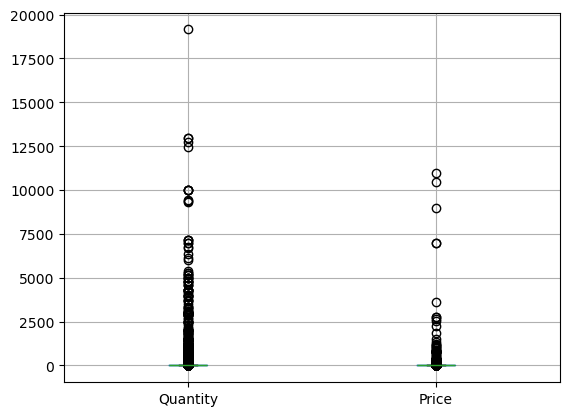

In [30]:
df1[["Quantity", "Price"]].boxplot();

## Recency

In [31]:
print("2009-2010: Min Date", df1["InvoiceDate"].min(), "Max Date", df1["InvoiceDate"].max())


2009-2010: Min Date 2009-12-01 07:45:00 Max Date 2010-12-09 20:01:00


In [33]:
recency1 = (dt.datetime(2010, 12, 9) - df1.groupby("Customer ID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})
recency1["Recency"] = recency1["Recency"].apply(lambda x: x.days)

In [35]:
recency1.head()

,Recency
Customer ID,
12346.00,163
12347.00,1
12348.00,72
12349.00,41
12351.00,9


In [36]:
freq1 = df1.groupby("Customer ID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})
freq1

,Frequency
Customer ID,
12346.00,11
12347.00,2
12348.00,1
12349.00,3
12351.00,1
...,...
18283.00,6
18284.00,1
18285.00,1


In [37]:
df1["TotalPrice"] = df1["Quantity"] * df1["Price"]

In [38]:
monetary1 = df1.groupby("Customer ID").agg({"TotalPrice":"sum"}).rename(columns={"TotalPrice":"Monetary"})

In [40]:
monetary1.head()

,Monetary
Customer ID,
12346.00,372.86
12347.00,1323.32
12348.00,222.16
12349.00,2671.14
12351.00,300.93


In [42]:
rfm1 = pd.concat([recency1, freq1, monetary1],  axis=1)
rfm1.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.00,163,11,372.86
12347.00,1,2,1323.32
12348.00,72,1,222.16
12349.00,41,3,2671.14
12351.00,9,1,300.93


In [44]:
rfm1["RecencyScore"] = pd.qcut(rfm1["Recency"], 5, labels = [5, 4 , 3, 2, 1])
rfm1["FrequencyScore"]= pd.qcut(rfm1["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
rfm1["MonetaryScore"] = pd.qcut(rfm1['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346.00,163,11,372.86,2,5,2
12347.00,1,2,1323.32,5,2,4
12348.00,72,1,222.16,2,1,1
12349.00,41,3,2671.14,3,3,5
12351.00,9,1,300.93,5,1,2


In [45]:
# RFM Scores: Category
rfm1["RFM_SCORE"] = (rfm1['RecencyScore'].astype(str) + 
                     rfm1['FrequencyScore'].astype(str) + 
                     rfm1['MonetaryScore'].astype(str))
rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346.00,163,11,372.86,2,5,2,252
12347.00,1,2,1323.32,5,2,4,524
12348.00,72,1,222.16,2,1,1,211
12349.00,41,3,2671.14,3,3,5,335
12351.00,9,1,300.93,5,1,2,512


In [46]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm1['Segment'] = rfm1['RecencyScore'].astype(str) + rfm1['FrequencyScore'].astype(str)
rfm1['Segment'] = rfm1['Segment'].replace(seg_map, regex=True)

rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346.00,163,11,372.86,2,5,2,252,Can't Loose
12347.00,1,2,1323.32,5,2,4,524,Potential Loyalists
12348.00,72,1,222.16,2,1,1,211,Hibernating
12349.00,41,3,2671.14,3,3,5,335,Need Attention
12351.00,9,1,300.93,5,1,2,512,New Customers


In [47]:
rfmStats1 = rfm1[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats1.columns = rfmStats1.columns.map('_'.join).str.strip('|')
rfmStats1

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
About to Sleep,51.85,51.00,343,10.26,1.20,1.00,343,0.40,442.27,317.76,343,417.30
At Risk,149.94,128.00,611,69.98,3.07,3.00,611,1.09,1188.21,760.19,611,1844.17
Can't Loose,121.72,106.50,78,49.72,9.04,7.50,78,5.78,4072.97,2316.49,78,5275.40
Champions,5.12,5.00,663,4.62,12.50,8.00,663,17.19,6852.26,2508.32,663,21556.38
Hibernating,212.31,211.00,1016,89.78,1.13,1.00,1016,0.33,401.98,250.16,1016,775.08
Loyal Customers,34.28,29.00,743,16.06,6.82,5.00,743,4.38,2743.48,1818.71,743,3255.11
Need Attention,51.21,51.00,207,9.84,2.45,2.00,207,0.50,1058.79,730.47,207,1190.26
New Customers,6.58,6.50,50,4.31,1.00,1.00,50,0.00,386.20,258.82,50,493.32
Potential Loyalists,16.77,17.00,516,9.73,2.02,2.00,516,0.70,729.16,523.66,516,837.55


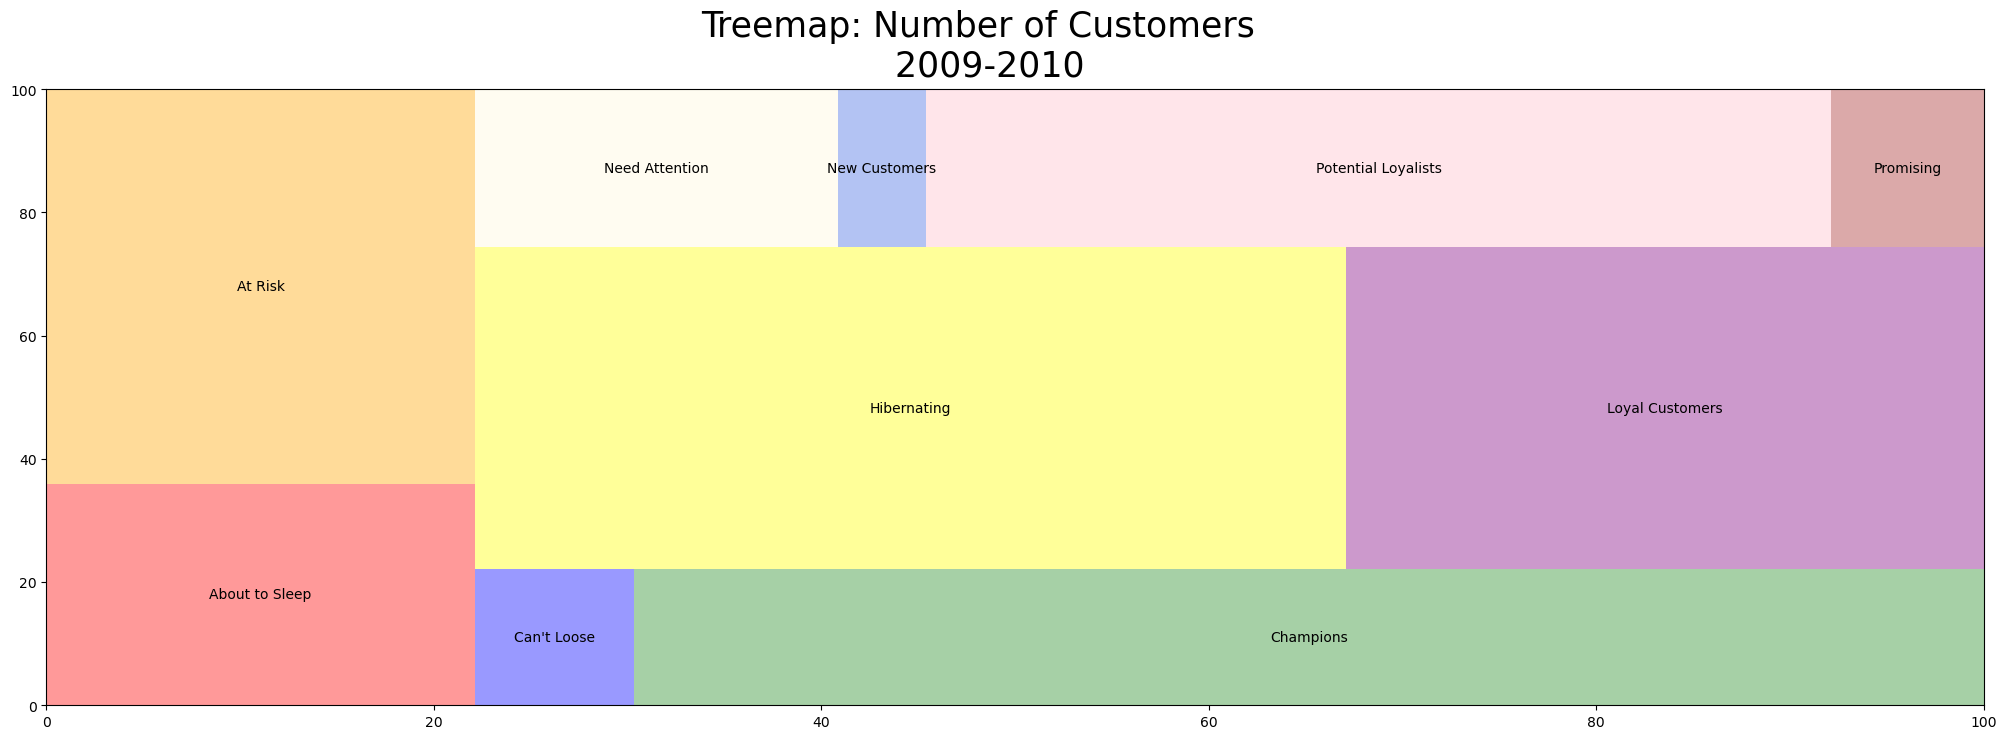

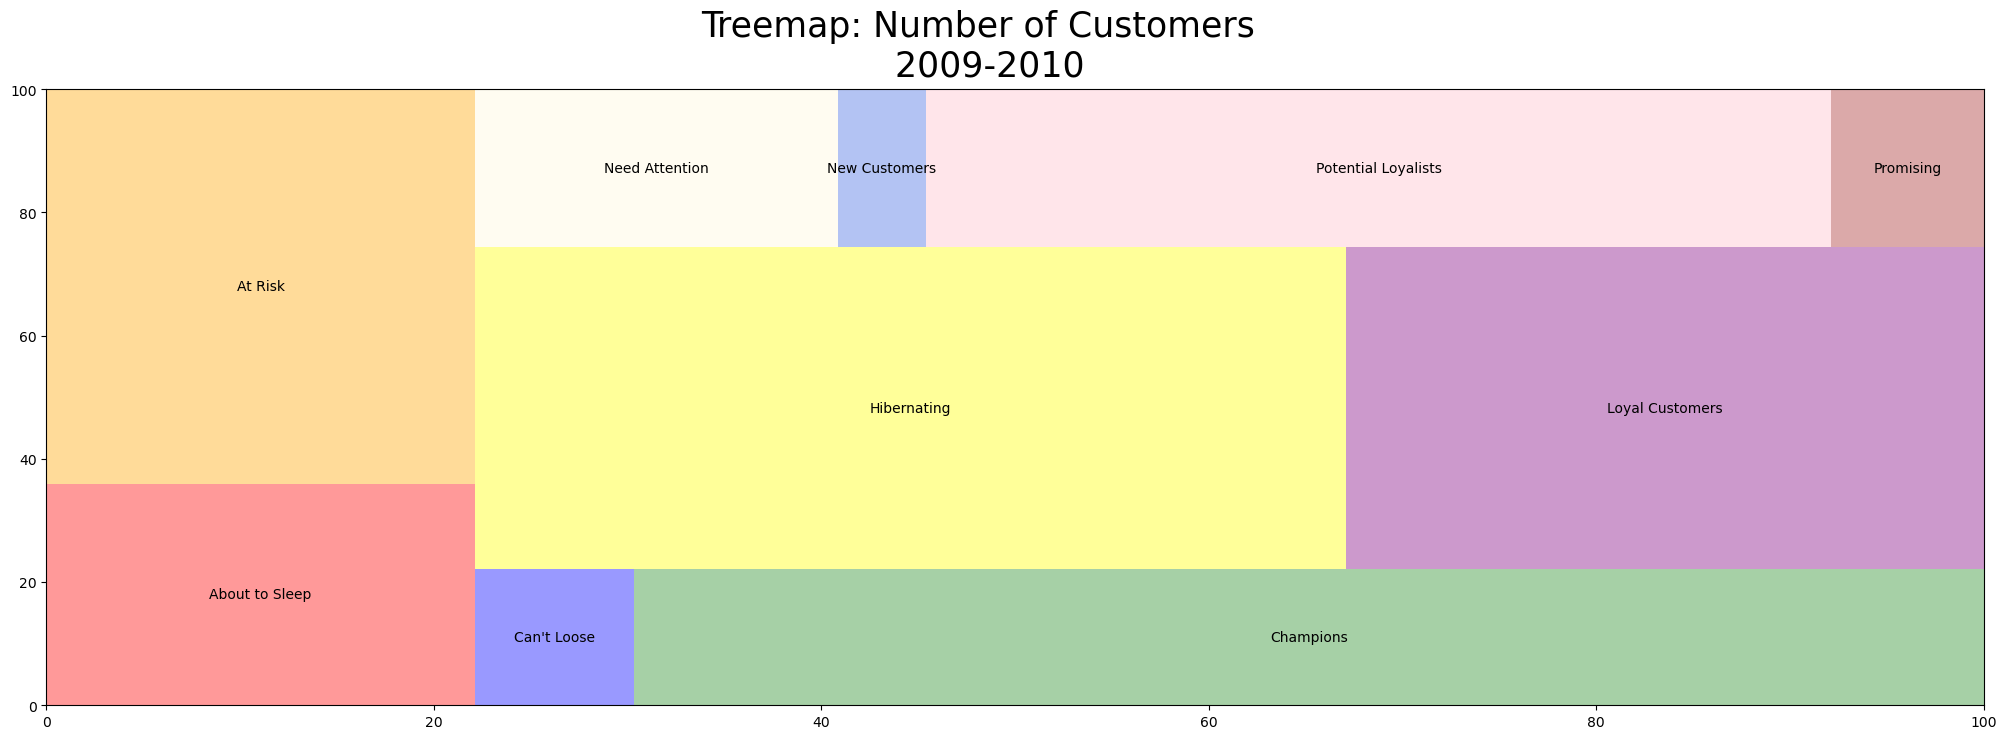

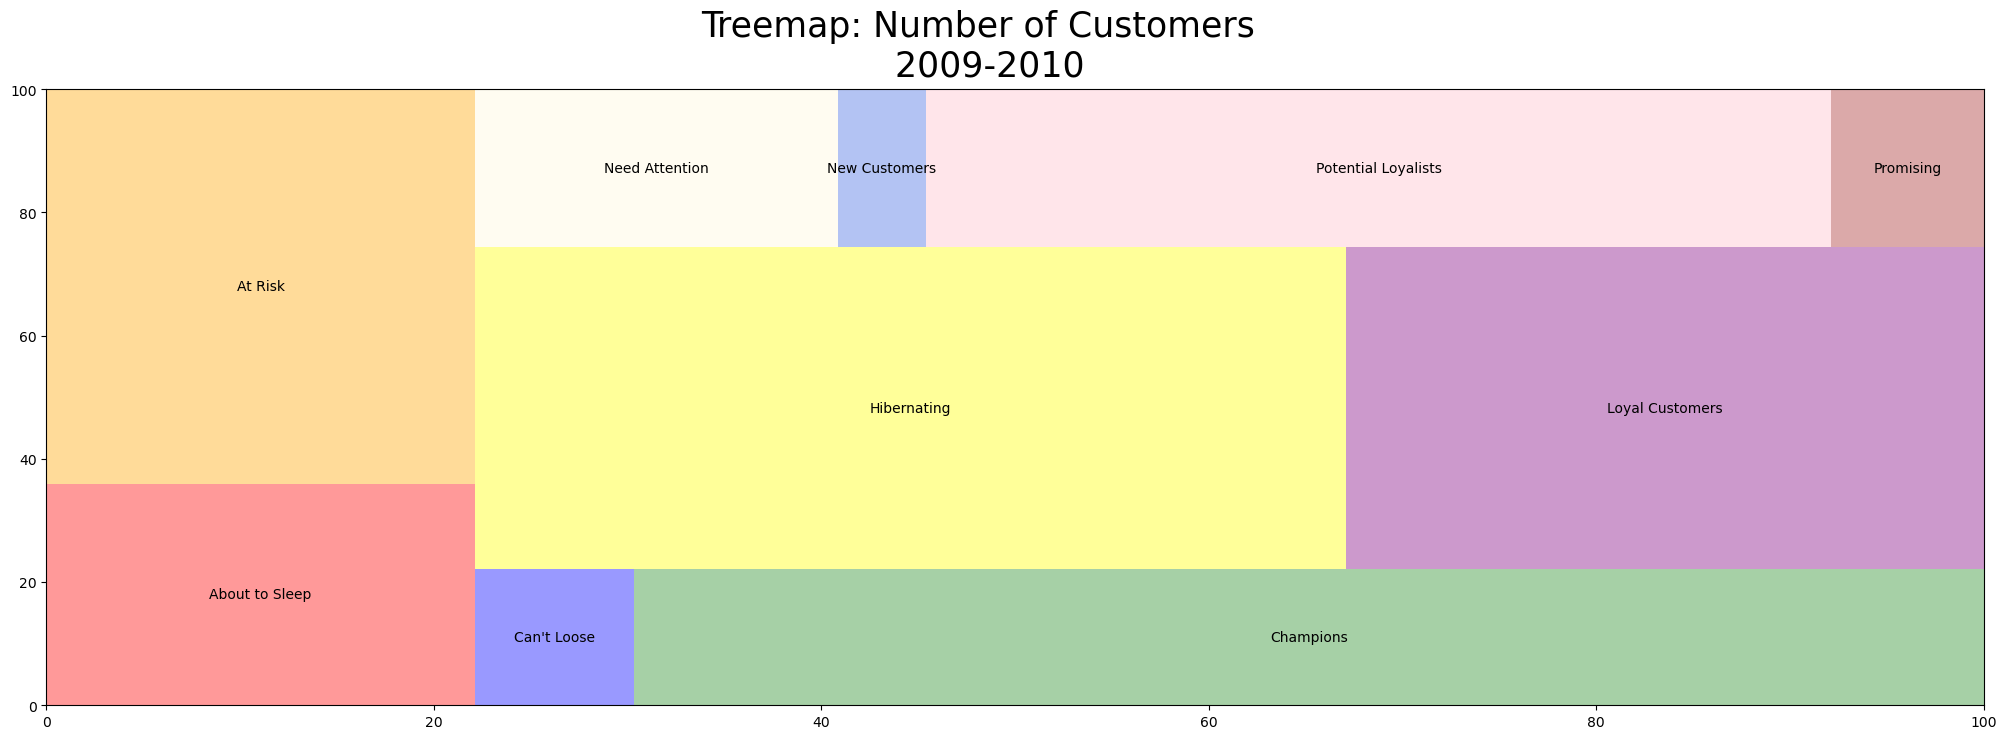

In [50]:
plt.figure(figsize = (25,8))
squarify.plot(sizes=rfmStats1.Recency_count, label=rfmStats1.index, 
              color=["red","orange","blue", "forestgreen", "yellow", "purple", "cornsilk","royalblue", "pink", "brown"], alpha=.4 )
plt.suptitle("Treemap: Number of Customers \n 2009-2010", fontsize=25);
plt.show()